In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

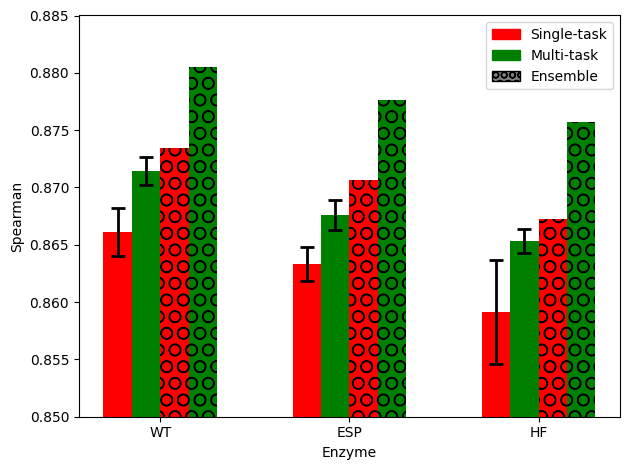

In [3]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-task'),
    mpatches.Patch(color='green', label='Multi-task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()
plt.show()

# More Figs

In [4]:
def get_dict_avg_std(filename, datasets, categories, is_various=False):
    data = pd.read_csv(filename)
    dict_average = {}
    dict_std = {}

    for category in categories:
        dict_average[category] = []
        dict_std[category] = []

    for dataset in datasets:
        
  
        dataset_columns = [col for col in data.columns if dataset in col]
        std_column = [col for col in dataset_columns if 'Std' in col]
        average_column = [col for col in dataset_columns if 'Average' in col]
        #print(f'{dataset_columns} {std_column} {average_column}')

        for category in categories:
            #print(f'{category} {dataset}')
            if is_various and dataset == 'leenay':
                dict_average[category].append(0)
                dict_std[category].append(0)
                continue
            
            if is_various:
                category_row = data[data['method'] == category]
            else:
                category_row = data[data['TL METHOD'] == category]
            avg_value = category_row[average_column].values[0,0]
            std_value = category_row[std_column].values[0,0]
            dict_average[category].append(avg_value)
            dict_std[category].append(std_value)

    return dict_average, dict_std





In [5]:
# Example datasets and categories
original_datasets = ['xu2015TrainHl60',
            'chari2015Train293T',
            'hart2016-Rpe1Avg',
            'hart2016-Hct1162lib1Avg',
            'hart2016-HelaLib1Avg',
            'hart2016-HelaLib2Avg',
            'xu2015TrainKbm7',
            'doench2014-Hs',
            'doench2014-Mm',
            'doench2016_hg19',
            'doench2016plx_hg19',
            'morenoMateos2015',
            'leenay']
datasets = []
IDEAL_LENGTH = 26
for dataset in original_datasets:
    # add spaces to the end of the dataset name to make it IDEAL_LENGTH long
    dataset += ' ' * (IDEAL_LENGTH - len(dataset))
    datasets.append(dataset)

categories_tl = ['gl_tl', 'full_tl', 'no_em_tl', 'LL_tl', 'no_tl', 'no_pre_train']

data_means_deephf,  data_stds_deephf= get_dict_avg_std('results_dhf.csv', original_datasets, categories_tl)
data_means_crispron, data_stds_crispron= get_dict_avg_std('results_co.csv', original_datasets, categories_tl)

categories_various = ['wuCrispr', 'wang', 'doench', 'chariRaw']
data_means_various, data_stds_various= get_dict_avg_std('results_various.csv', original_datasets, categories_various, is_various = True)


print(data_means_deephf)

{'gl_tl': [0.62374, 0.36084, 0.33372, 0.47768, 0.42914, 0.4833, 0.63904, 0.63394, 0.60246, 0.4054, 0.32804, 0.40478, 0.26702], 'full_tl': [0.6245, 0.42014, 0.33408, 0.48032, 0.43224, 0.48726, 0.63952, 0.64532, 0.61058, 0.40636, 0.3318, 0.41438, 0.26798], 'no_em_tl': [0.62376, 0.41602, 0.3309, 0.47736, 0.42874, 0.4793, 0.63808, 0.63528, 0.59846, 0.4058, 0.3292, 0.38606, 0.2518], 'LL_tl': [0.62334, 0.34966, 0.33386, 0.47722, 0.42918, 0.48326, 0.63858, 0.6337, 0.60262, 0.40584, 0.32644, 0.39898, 0.24866], 'no_tl': [0.6174, 0.43494, 0.31876, 0.47324, 0.42452, 0.47064, 0.62996, 0.62744, 0.5837, 0.40164, 0.32292, 0.26166, 0.19642], 'no_pre_train': [0.31044, 0.03328, 0.08882, 0.1484, 0.09286, 0.17932, 0.34294, 0.29066, 0.18456, 0.24312, 0.22792, 0.2748, 0.11778]}


## TL Comparison

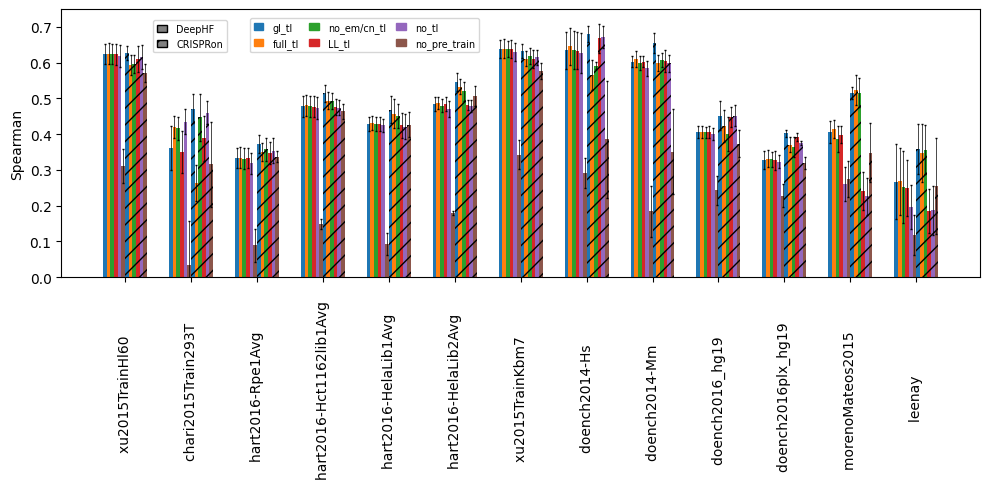

In [6]:



hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']



num_datasets = len(datasets)
num_categories = len(categories_tl)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width / 2  # half for normal, half for OO texture
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories_tl):
    plt.bar(index + i * bar_width, data_means_deephf[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds_deephf[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Plot bars for OO texture model with 'hatch' pattern
for i, category in enumerate(categories_tl):
    plt.bar(index + (i+6) * bar_width , data_means_crispron[category], bar_width, 
            label=f'{category} (OO Texture)', hatch='//', yerr=data_stds_crispron[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})
# Add labels, title, and legend
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
plt.xticks(index-bar_width*3.5 + total_width / 2, datasets, rotation=90)


legend_1_elements = [
    mpatches.Patch(color=hex_colors[0], label='gl_tl'),
    mpatches.Patch(color=hex_colors[1], label='full_tl'),
    mpatches.Patch(color=hex_colors[2], label='no_em/cn_tl'),
    mpatches.Patch(color=hex_colors[3], label='LL_tl'),
    mpatches.Patch(color=hex_colors[4], label='no_tl'),
    mpatches.Patch(color=hex_colors[5], label='no_pre_train'),]


legend_2_elements = [
    mpatches.Patch(facecolor='grey', edgecolor='k', label='DeepHF'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='//', label='CRISPRon')]

legend1 = plt.legend(handles=legend_1_elements, loc='lower center', bbox_to_anchor=(0.33, 0.82), ncol=3,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

plt.gca().add_artist(legend1)

plt.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.14, 0.82), ncol=1,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)



# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.0, 0.75)
# make figure bigger

# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part1.png', dpi=300)

# Show the plot
plt.show()


## VS Other Methods

0.261295456


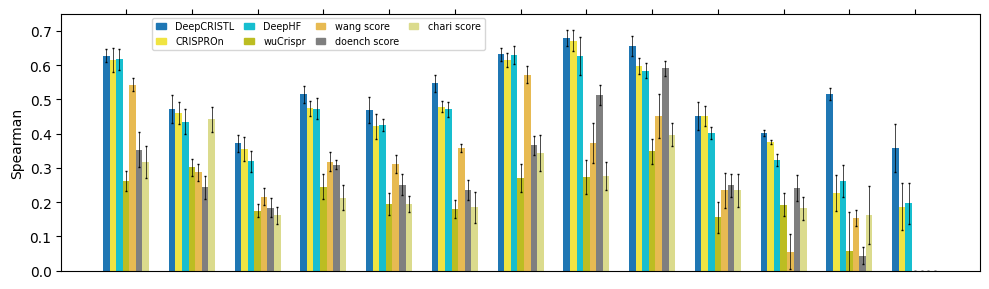

In [7]:
# Example datasets and categories
categories = ['DeepCRISTL', 'CRISPROn', 'DeepHF', 'wuCrispr', 'wang score', 'doench score', 'chari score']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means = {
    'DeepCRISTL': data_means_crispron['gl_tl'],
    'CRISPROn': data_means_crispron['no_tl'],
    'DeepHF': data_means_deephf['no_tl'],
    'wuCrispr': data_means_various['wuCrispr'],
    'wang score': data_means_various['wang'],
    'doench score': data_means_various['doench'],
    'chari score': data_means_various['chariRaw'],
}



# Standard deviations for each category
data_stds = {
    'DeepCRISTL':  data_stds_crispron['gl_tl'],
    'CRISPROn':  data_stds_crispron['no_tl'],
    'DeepHF':  data_stds_deephf['no_tl'],
    'wuCrispr':  data_stds_various['wuCrispr'],
    'wang score':  data_stds_various['wang'],
    'doench score':  data_stds_various['doench'],
    'chari score':  data_stds_various['chariRaw'],
}

print(data_means['wuCrispr'][0])




#hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
hex_colors = ['#1f77b4', '#f0e442', '#17becf', '#bcbd22', '#e7ba52', '#7f7f7f', '#dbdb8d']
#hex_colors = ['#1f77b4', '#443983', '#31688e', '#21918c', '#35b779', '#90d743', '#fde725']




num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width 
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds[category], capsize=1, color = hex_colors[i], error_kw={'elinewidth': 0.5})

# Add labels, title, and legend
# show x label on top
#plt.xlabel('Dataset')
plt.ylabel('Spearman')
#plt.xticks(index-bar_width*2+ total_width / 2, datasets, rotation=90)
# same but xticks are above the bars
#plt.xticks(index-bar_width*2 + total_width / 2, None)
# remove xticks
plt.xticks([])


legend_elements = [
    mpatches.Patch(color=hex_colors[0], label='DeepCRISTL'),
    mpatches.Patch(color=hex_colors[1], label='CRISPROn'),
    mpatches.Patch(color=hex_colors[2], label='DeepHF'),
    mpatches.Patch(color=hex_colors[3], label='wuCrispr'),
    mpatches.Patch(color=hex_colors[4], label='wang score'),
    mpatches.Patch(color=hex_colors[5], label='doench score'),
    mpatches.Patch(color=hex_colors[6], label='chari score'),
]





plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.28, 0.84), ncol=4,
            fontsize='x-small', handlelength=1, handletextpad=1, columnspacing=1)

# make figure bigger
plt.gcf().set_size_inches(10, 3)

# set y axis limits
plt.ylim(0.0, 0.75)

# show x axis on top
plt.gca().xaxis.set_ticks_position('top')

plt.xticks(index-bar_width*2 + total_width / 2, [], rotation=90)



# Adjust layout
plt.tight_layout()


# save the plot
plt.savefig('part2.png', dpi=300)

# Show the plot
plt.show()


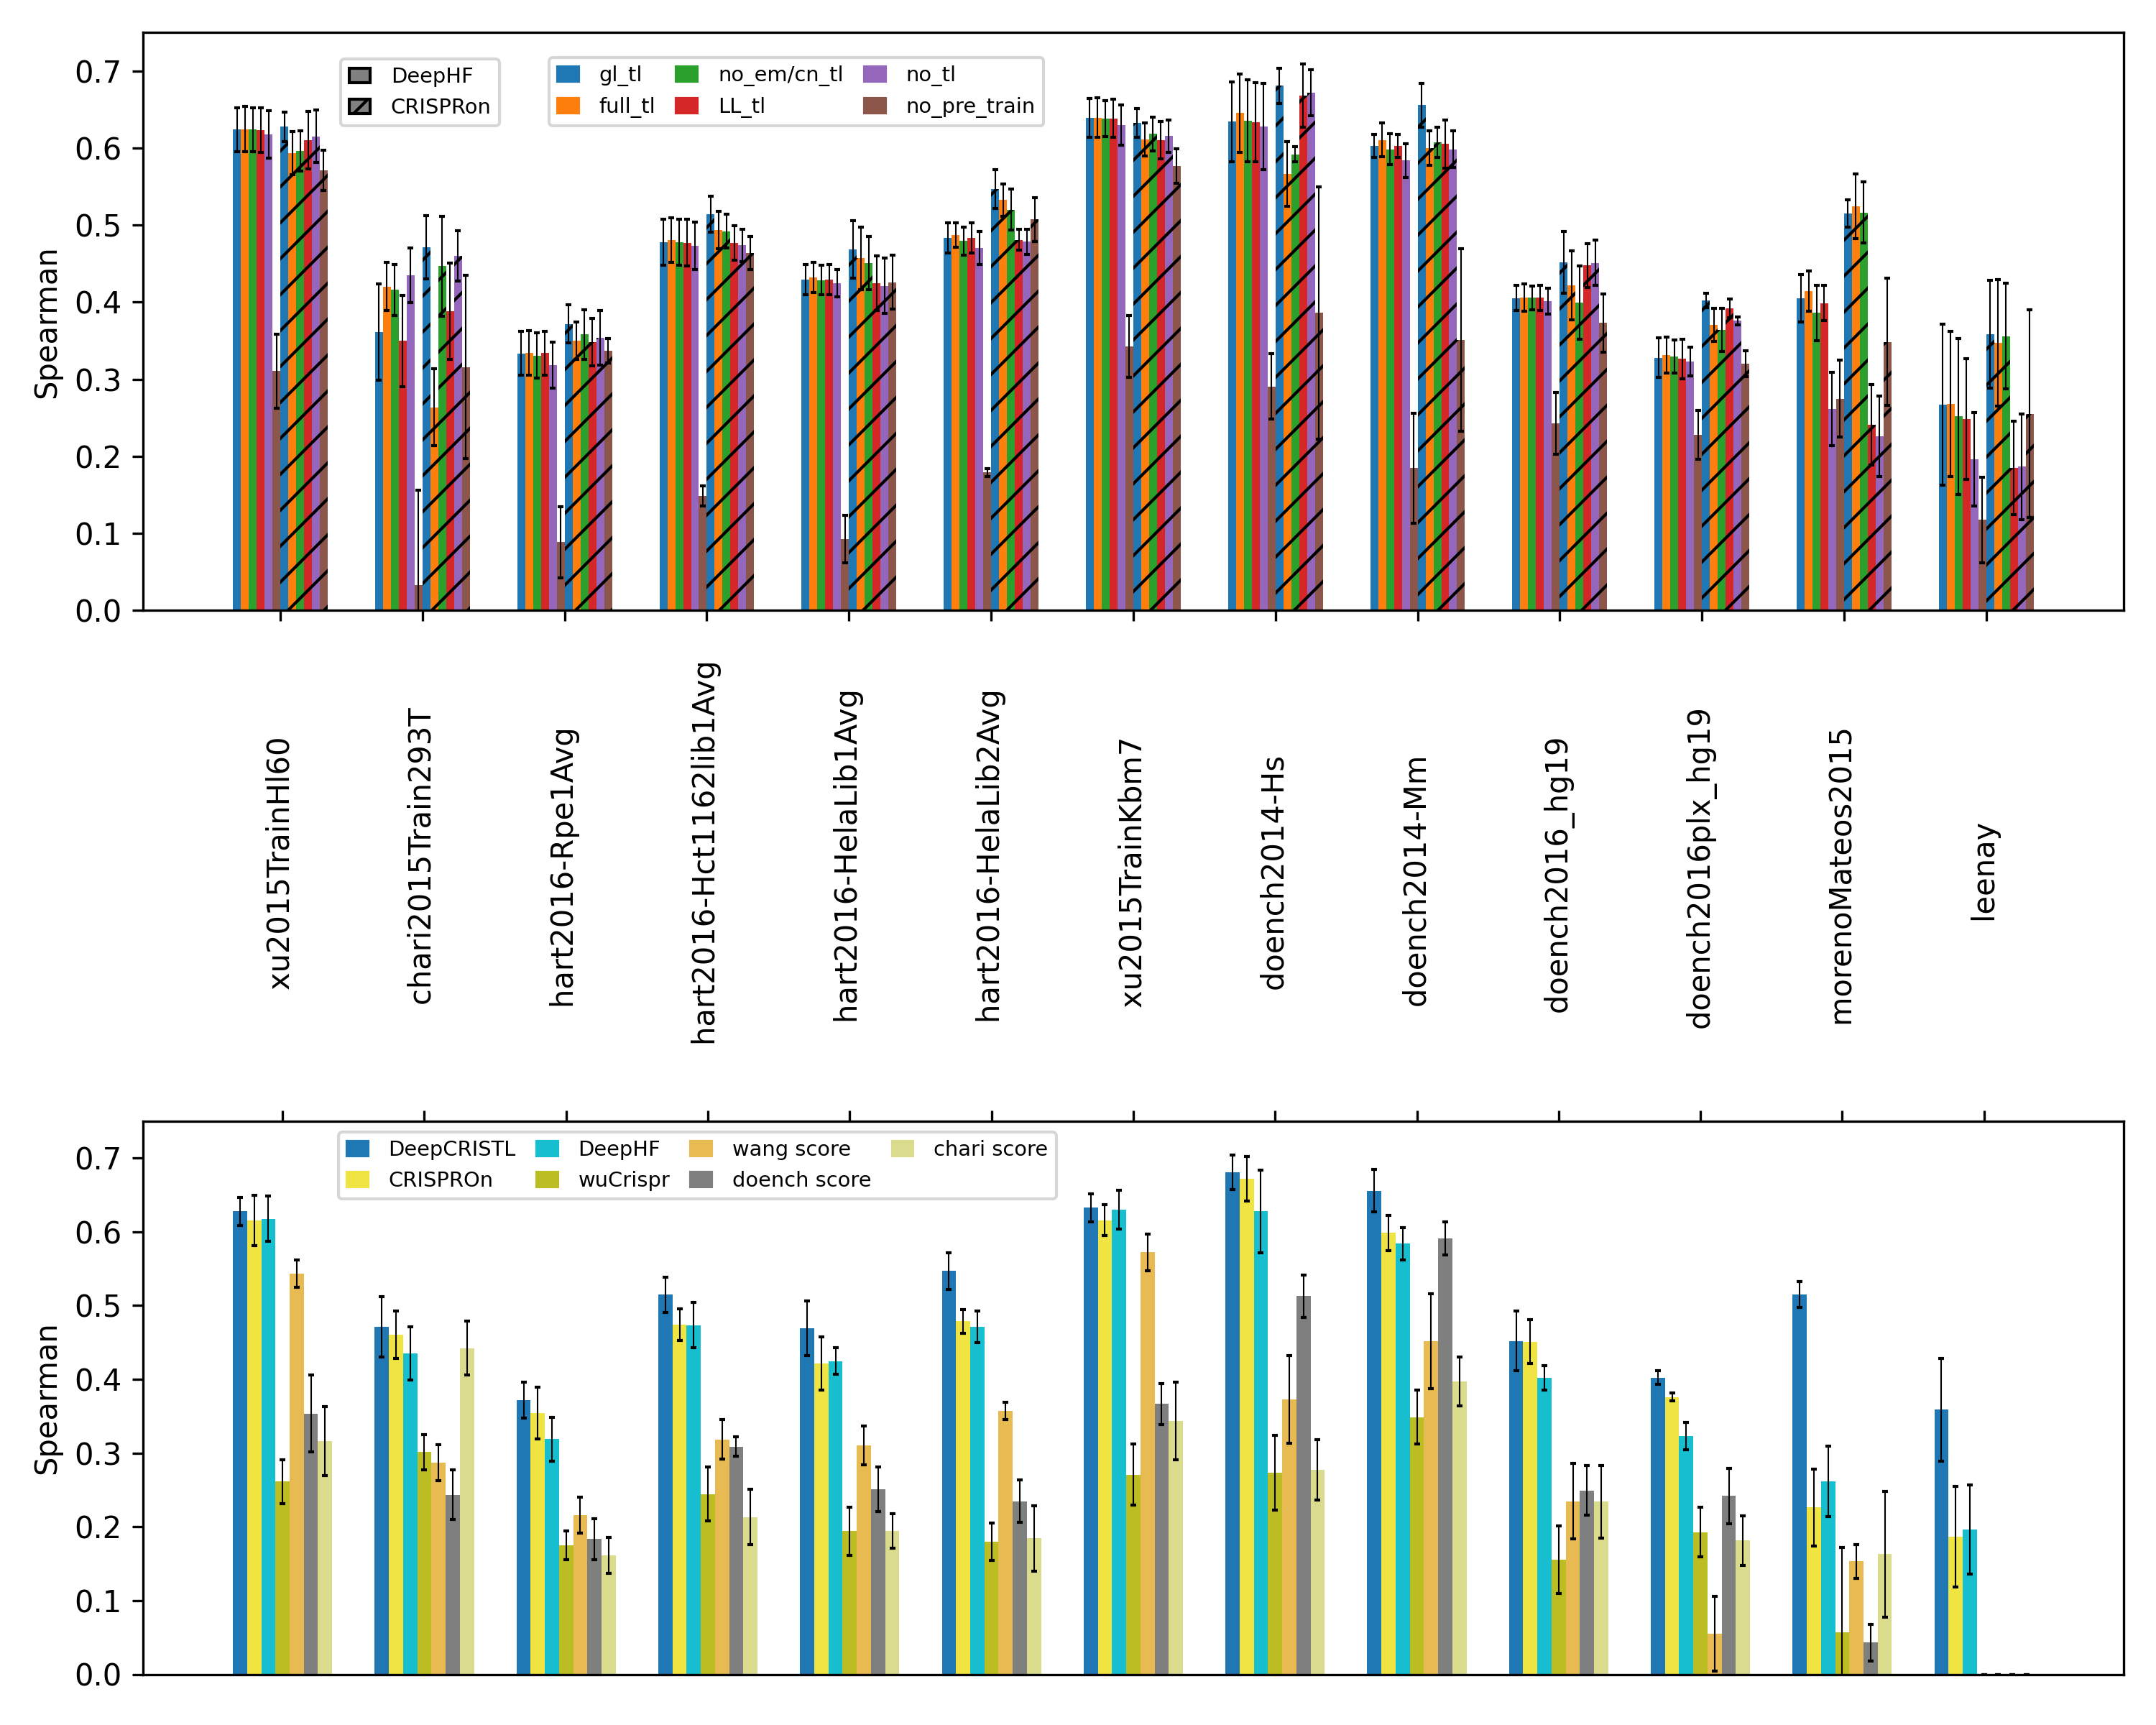

In [8]:
# combine
from PIL import Image
def merge_images_vertically(img_path1, img_path2, output_path):
    # Open the images
    image1 = Image.open(img_path1)
    image2 = Image.open(img_path2)
    
    # Calculate the size of the output image
    width = max(image1.width, image2.width)
    height = image1.height + image2.height
    
    # Create a new image with the calculated size
    new_image = Image.new('RGB', (width, height))
    
    # Paste the first image at the top
    new_image.paste(image1, (0, 0))
    
    # Paste the second image below the first one
    new_image.paste(image2, (0, image1.height))
    
    # Save the new image
    new_image.save(output_path)

# Example usage
merge_images_vertically('part1.png', 'part2.png', 'combined.png')


# Show the combined image



# delete all 3 images
import os
os.remove('part1.png')
os.remove('part2.png')
#os.remove('combined.png')

Image.open('combined.png')


# LOSS GRAPHS

In [9]:

def show_loss_graph(val_loss, train_loss, title):
    plt.plot(val_loss, label='Validation Loss')
    plt.plot(train_loss, label='Training Loss')
    plt.title(title)
    plt.legend()
    plt.show()

def show_broken_loss_graph(val_loss, train_loss, title):
    # Create a figure and a grid of subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 2]})
    
    # This is the magic number to scale the lower part of the plot
    # This number can be adjusted based on the relative difference in data magnitude
    magic_number = 0.05

    # Determine the break point (you might need to adjust this)
    break_point = max(max(val_loss), max(train_loss)) * magic_number

    # Plot on first subplot (upper)
    ax1.plot(val_loss, label='Validation Loss')
    ax1.plot(train_loss, label='Training Loss')
    ax1.set_title(title)
    ax1.legend(loc='best')
    ax1.spines['bottom'].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax1.set_ylim(break_point * 4, 1.1 * max(max(val_loss), max(train_loss)))  # Adjust this range accordingly

    # Plot on second subplot (lower)
    ax2.plot(val_loss, label='Validation Loss')
    ax2.plot(train_loss, label='Training Loss')
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.tick_bottom()
    ax2.set_ylim(0, break_point * 2)  # Adjust this range accordingly

    # This section creates the diagonal lines at the break
    d = .015  # size of the diagonal lines in axes coordinates
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

    plt.xlabel('Epochs')
    plt.show()

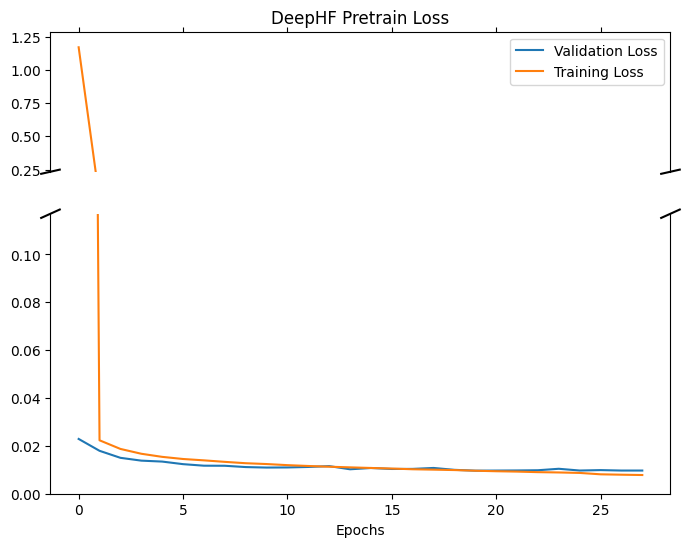

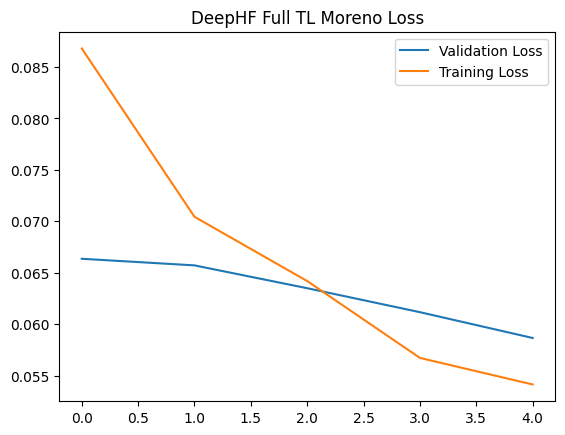

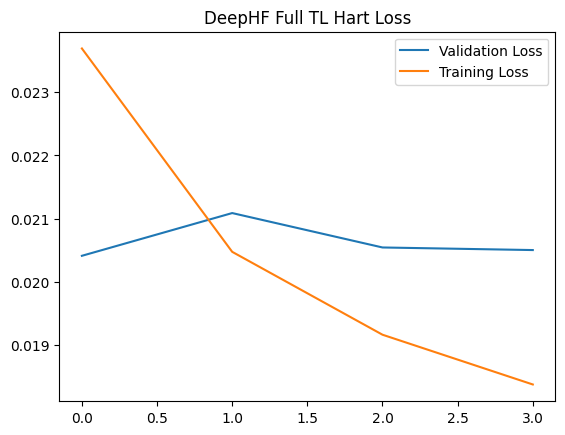

In [10]:
dhf_pretrain_val_loss = [0.022885681033612677,0.0179318568972083,0.015000633442549895,0.013823838711870455,0.013431630303450985,0.012355583455559989,0.011710438553153242,0.011681079148273772,0.011136771038039324,0.010930555339724729,0.010976315625443142,0.011180962261927758,0.011534226778513793,0.010210425284971127,0.010746166509822545,0.010339727735896613,0.010376187550992242,0.010767879189708182,0.009980385546463603,0.009631456839274598,0.0096763689253951,0.009722706833067403,0.009809498501516925,0.010422310735489377,0.009691372014444786,0.009870455553196772,0.009683607542441778,0.009684836504465909]
dhf_pretrain_train_loss = [1.1699221701180968,0.022326279213918606,0.018717740942075536,0.01670049042045197,0.015403969675829094,0.01450927462108578,0.013940963592155449,0.013313015797647284,0.012746961690259344,0.012399638173734058,0.011941492523027142,0.011588198273059352,0.011279899936046273,0.011013761997471715,0.01076021665207427,0.01051832499967893,0.010220400152182937,0.01006008058778606,0.009883610816570158,0.009610534333871242,0.009393905226432603,0.009243086417953955,0.00901439040846025,0.008884999297062811,0.008690175217635399,0.008110176473028988,0.007947839973691515,0.007812525775987044]

dhf_moreno_val_loss = [0.06635663658380508, 0.06571496278047562, 0.06349532306194305, 0.06116688624024391, 0.058659862726926804]
dhf_moreno_train_loss =  [0.08679044150373563, 0.07043599256244647, 0.06418818990592243, 0.05672217895384549, 0.05414267543221817]


dhf_hart_val_loss= [0.020412371274741256, 0.0210884201395161, 0.020544171607231394, 0.02050315879066201]
dhf_hart_train_loss= [0.02369166519274016, 0.020475232608947055, 0.01916417980070564, 0.018377104286571317]


show_broken_loss_graph(dhf_pretrain_val_loss, dhf_pretrain_train_loss, 'DeepHF Pretrain Loss')
show_loss_graph(dhf_moreno_val_loss, dhf_moreno_train_loss, 'DeepHF Full TL Moreno Loss')
show_loss_graph(dhf_hart_val_loss, dhf_hart_train_loss, 'DeepHF Full TL Hart Loss')


